<a href="https://colab.research.google.com/github/kandi00/Allamvizsga/blob/main/tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import quantile_transform   
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.flush_and_unmount()

Raw datasets

In [ ]:
path = '/content/drive/My Drive/Államvizsga/csv_files/'
nrows=100
df_human = pd.read_csv(path+'1min.csv', nrows=nrows)
df_bot_bezier = pd.read_csv(path+'bot_bezier.csv', nrows=nrows)
df_bot_bezier_random = pd.read_csv(path+'bot_bezier_random.csv', nrows=nrows)
df_bot_humanLike = pd.read_csv(path+'bot_humanLike.csv', nrows=nrows)
df_bot_humanLike_random = pd.read_csv(path+'bot_humanlike_random.csv', nrows=nrows)

In [ ]:
df_human['label'] = 0
df_bot_bezier['label'] = 1
df_bot_bezier_random['label'] = 1
df_bot_humanLike['label'] = 1
df_bot_humanLike_random['label'] = 1

Datasets with extracted features

In [ ]:
nrows=100
df_human_ = pd.read_csv(path+'1min_extracted_features.csv', nrows=nrows)
df_bot_bezier_ = pd.read_csv(path+'bot_bezier_extracted_features.csv', nrows=nrows)
df_bot_bezier_random_ = pd.read_csv(path+'bot_bezier_random_extracted_features.csv', nrows=nrows)
df_bot_humanLike_ = pd.read_csv(path+'bot_humanLike_extracted_features.csv', nrows=nrows)
df_bot_humanLike_random_ = pd.read_csv(path+'bot_humanLike_random_extracted_features.csv', nrows=nrows)

In [ ]:
df_human_['label'] = 0
df_bot_bezier_['label'] = 1
df_bot_bezier_random_['label'] = 1
df_bot_humanLike_['label'] = 1
df_bot_humanLike_random_['label'] = 1

In [ ]:
print(df_human.append(df_bot_bezier))

     dx1   dx2   dx3    dx4    dx5    dx6    dx7    dx8    dx9   dx10  ...  \
0   -9.0 -57.0 -83.0 -128.0  -48.0  -72.0   -2.0    4.0    4.0    0.0  ...   
1   -5.0 -20.0 -40.0  -67.0 -117.0 -126.0 -104.0 -109.0  -55.0 -142.0  ...   
2    6.0  15.0  12.0   19.0   23.0   19.0   26.0   28.0   25.0   25.0  ...   
3   -1.0  -4.0  -4.0   -8.0  -12.0  -16.0  -20.0  -22.0 -139.0  -95.0  ...   
4   -1.0  -1.0  -3.0   -2.0   -5.0   -6.0   -1.0   -1.0    0.0    1.0  ...   
..   ...   ...   ...    ...    ...    ...    ...    ...    ...    ...  ...   
95  69.0  59.0  49.0   41.0   33.0   25.0   19.0   12.0    7.0    2.0  ...   
96  -9.0  -6.0  -2.0    1.0    5.0    8.0   10.0   14.0   15.0   18.0  ...   
97 -61.0 -56.0 -51.0  -45.0  -42.0  -36.0  -33.0  -28.0  -25.0  -22.0  ...   
98 -52.0 -49.0 -44.0  -42.0  -37.0  -34.0  -31.0  -28.0  -25.0  -22.0  ...   
99 -64.0 -60.0 -56.0  -52.0  -48.0  -44.0  -39.0  -36.0  -30.0  -27.0  ...   

    dy120  dy121  dy122  dy123  dy124  dy125  dy126  dy127  dy1

In [ ]:
def plot_tsne(df, NUM_CLASSES, plot_title, plot_suptitle, i, output_name):
    rows, cols = df.shape
    array = df.values
    X = array[:, 0:cols - 1]
    y = array[:, -1]
    
    quantile_transform(X, n_quantiles=10, random_state=0, copy=False)

    y = LabelEncoder().fit_transform(y)
    # print(y)
    tsne = TSNE(n_components=2, init='pca', random_state=42)
    X_2d = tsne.fit_transform(X)
    target_ids = np.unique(y)

    plt.subplot(1, 2, i)
    for i in target_ids:
      plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1])

    legendstr = list()
    legendstr.append("HUMAN")
    legendstr.append("BOT")
    plt.legend(legendstr)
    plt.title(plot_title)
    plt.suptitle(plot_suptitle)
    plt.savefig('/content/' + output_name + '.png')

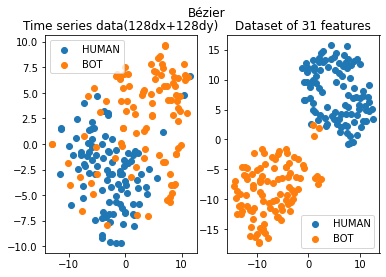

In [ ]:
plot_tsne(df_human.append(df_bot_bezier), 2, 'Time series data(128dx+128dy)', 'Bézier', 1, 'bezier')
plot_tsne(df_human_.append(df_bot_bezier_), 2, 'Dataset of 29 features', 'Bézier', 2, 'bezier')

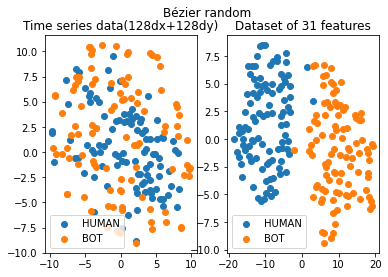

In [ ]:
plot_tsne(df_human.append(df_bot_bezier_random), 2, 'Time series data(128dx+128dy)', 'Bézier random', 1, 'bezier_random')
plot_tsne(df_human_.append(df_bot_bezier_random_), 2, 'Dataset of 29 features', 'Bézier random', 2, 'bezier_random')

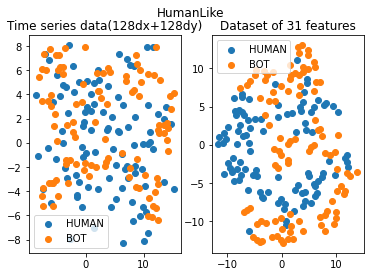

In [ ]:
plot_tsne(df_human.append(df_bot_humanLike), 2, 'Time series data(128dx+128dy)', 'HumanLike', 1, 'humanlike')
plot_tsne(df_human_.append(df_bot_humanLike_), 2, 'Dataset of 29 features', 'HumanLike', 2, 'humanlike')

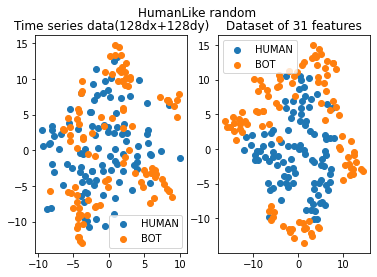

In [ ]:
plot_tsne(df_human.append(df_bot_humanLike_random), 2, 'Time series data(128dx+128dy)', 'HumanLike random', 1, 'humanlike_random')
plot_tsne(df_human_.append(df_bot_humanLike_random_), 2, 'Dataset of 29 features', 'HumanLike random', 2, 'humanlike_random')